# Exercises

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# CaImAn funtions and objects
import caiman as cm
from caiman.source_extraction.cnmf import params as params

import seaborn as sns
sns.set_theme(context='notebook',style='white',font_scale=1.5)

## Exercise 1: Image characteristics
---

**A.** Distiguishing pixels   

Fluctuations in the activitation of the neuron can be directly observed on the video or in a temporal trace plot. Plotting the temporal trace will allow us to see the calcium transient dinamic, if a pixel belonging to a neuron is selected. 

* Select a set of *N* random pixels from the ROI and plot the temporal evolution of pixel value. If the random pixels are choosen from an active neuron, you will be able to see the calcium transcient dynamic. 

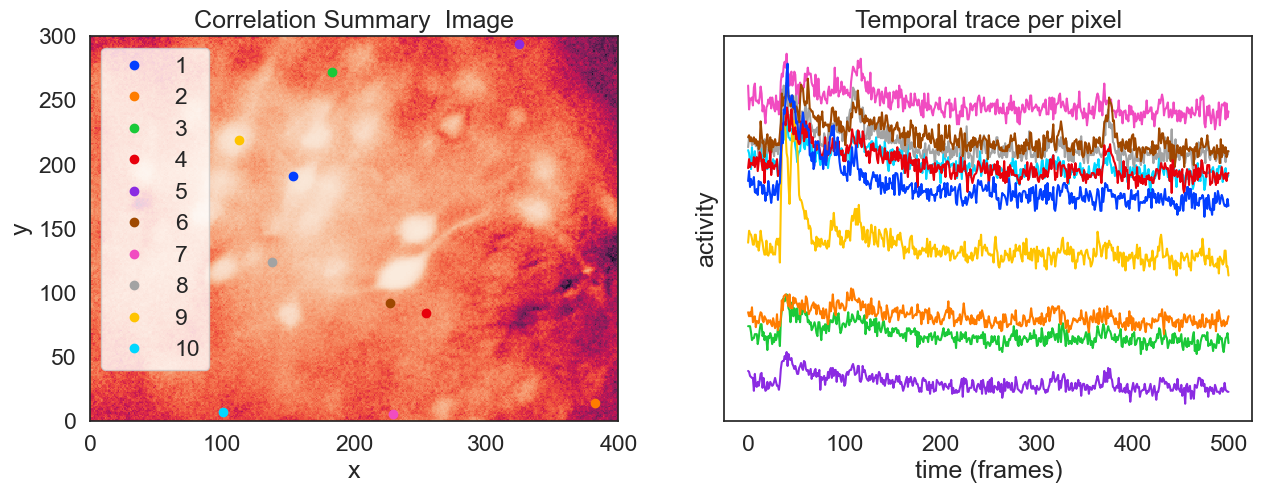

In [63]:
# Path to ROI file
input_tif_file_path = 'data/caiman_video_trial_0.tif'

# Number of random pixels
N = 10

# Load the file into a numpy array
ROI = cm.load(input_tif_file_path)
data = np.array(ROI)

# Generate N random pixel coordinates
resolution = data.shape[1:]
rng = np.random.default_rng(seed=123456)
random_coordinates = np.round(rng.uniform(size=(N, 2)) * resolution).astype(int)

figure, axes = plt.subplots(1,2,figsize=(15,5))

# Visualize coordinates on correlation image
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Correlation Summary  Image')
correlation_image, _ = cm.summary_images.correlation_pnr(ROI, swap_dim=False)
colors = sns.color_palette('bright')
axes[0].pcolormesh(correlation_image)
for i, [y, x] in enumerate(random_coordinates):
    axes[0].plot(x, y, 'o', c=colors[i], label=i+1)
axes[0].legend(loc='upper left')

# Visualize temporal traces per pixel
axes[1].set_xlabel('time (frames)')
axes[1].set_ylabel('activity')
axes[1].set_yticks([])
axes[1].set_title('Temporal trace per pixel')
for i, [y, x] in reversed(list(enumerate(random_coordinates))): # Reverse plotting order to increase visibility of pixel 1
    X = np.arange(data.shape[0])
    trace = data[:, y, x]
    axes[1].plot(X, trace, c=colors[i])

In the right figure, the temporal traces for 10 random pixel are shown. In the left figure, the location of these pixels can be seen projected on the correlation summary image. Pixels 1 and 9 are placed in an active neuron. This is reflected in their significantly larger peaks in activity as seen in the trace figure (during frames 40-80). It could be argued that these larger peaks are the result of their respective neurons firing, whereas pixels placed in the background will have more noisy traces which are not affected as much by spikes of individual neurons, resulting in smaller peaks.

**B.** Temporal statistics
 * For the selected pixels, plot the histogram of pixel value. What are the difference in different regions?, and how can that help to differ a neuron from the background?

* If we can already see the calcium traces from the row data, why do we need to do a segmentation of the neurons? Why, as a starter, would not be a good idea to work directly with the temporal traces? 

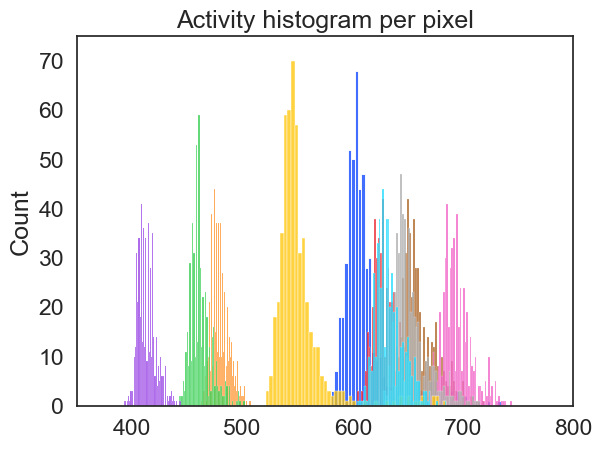

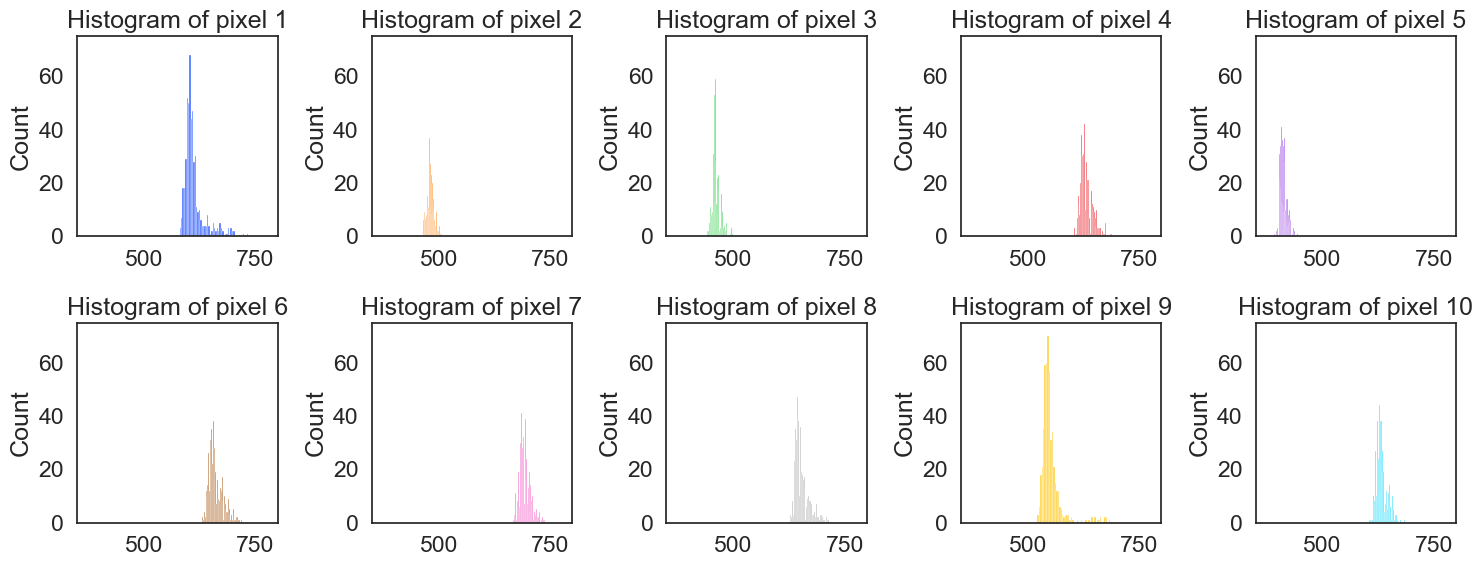

In [78]:
# Visualize histograms per pixel, overlapping
plt.title('Activity histogram per pixel')
for i, [y, x] in enumerate(random_coordinates):
    trace = data[:, y, x]
    sns.histplot(trace, color=colors[i], bins=50)
plt.xlim(350, 800)
plt.ylim(0, 75)
plt.show()

figure, axes = plt.subplots(2,5,figsize=(15,6))

# Visualize histograms per pixel, individually
for i, [y, x] in enumerate(random_coordinates):
    ax = axes[i // 5][i % 5]
    ax.set_title(f'Histogram of pixel {i + 1}')
    trace = data[:, y, x]
    sns.histplot(trace, color=colors[i], ax=ax, bins=50)
    ax.set_xlim(350, 800)
    ax.set_ylim(0, 75)
figure.tight_layout()

In the top figure the activity histograms for all pixels are shown together. In the bottom 10 figures these histograms are shown individually. There are some clear differences between the histograms of pixels 1 and 9 (placed in an active neuron) and the other pixels (placed in the background). First of all, the peaks of the histograms for pixel 1 and 9 are higher than for the other pixels. This means that the activity of these pixels is concentrated more tightly around a certain value. Intuitively this makes sense, since the activity of these pixels is largely determined by a single neuron, whereas the other pixels' activity is determined by many background neurons and is therefore more noisy. Additionally, the histograms for pixel 1 and 9 have a longer right tail than the other pixels, reflecting the observation from the previous exercise that these pixels have larger peaks in activity. These differences in histogram shapes could help differentiate between pixels placed in active neurons and those placed in the background.

There are several reasons for segmentation of the neurons, rather than directly using temporal traces of pixels. First of all, it is the activity of the neurons in the focal plane of the microscope that are of interest. Not all pixels are placed on one of these neurons, making them irrelevant. Distinguishing between these pixels and the pixels placed on relevant neurons can somewhat be done through manual inspection of their activity histograms, but this is time consuming and probably not very accurate. Additionally, all pixels are influenced by background noise which includes activity of neurons not in the focal plane, which are irrelevant. Pixels placed on relevant neurons are influenced by this irrelevant activity, meaning that their temporal traces do not correspond directly with the activity of the neuron they are placed on. Therefore, the only way to get the activity of relevant neurons is to perform segmentation of the neurons, removing background noise in the process.